In [ ]:
# Instalación de NLTK
!pip install nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
import re

In [ ]:
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data=pd.read_csv('train_.csv' )

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
# Mostrar el número de opiniones positivas y negativas
print(data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data_new = data.head(5000)

In [ ]:
data_new.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data_new.columns = ['Texto', 'Sentimiento']

In [ ]:
def remover_html(text):
    remover = re.compile('<.*?>')
    return re.sub(remover,'',text)

data_new['Texto'] = data_new['Texto'].apply(remover_html)
data_new.head()

<ipython-input-15-8a0e23c3d95d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Texto'] = data_new['Texto'].apply(remover_html)


,Texto,Sentimiento
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def convertir_minusculas(text):
  return text.lower()

data_new['Texto'] = data_new['Texto'].apply(convertir_minusculas)
data_new.sample(7)

<ipython-input-16-3860d79b893f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Texto'] = data_new['Texto'].apply(convertir_minusculas)


,Texto,Sentimiento
2423,may be spoilers so do not read if you do not w...,negative
1374,brown of harvard is a hard movie to pin down. ...,positive
3763,"for all the hoopla, respect and recognition th...",positive
2542,ted v. mikels's film corpse grinders 2 is 103 ...,negative
3885,"this is a good film, no doubt, but with some o...",positive
4519,this is a weak sequel: it lacks the interest a...,negative
4280,"purple rain... what else can i say, the title ...",positive


In [ ]:
def remover_no_alfanum(text):
  x = ''
  for i in text:
      if i.isalnum():
          x = x+i
      else:
          x = x + ' '
  return x

data_new['Texto'] = data_new['Texto'].apply(remover_no_alfanum)
data_new.head()

<ipython-input-17-1ef668df6301>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Texto'] = data_new['Texto'].apply(remover_no_alfanum)


,Texto,Sentimiento
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


In [ ]:
import nltk
from nltk.corpus import stopwords

def remover_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
          x.append(i)

    y = x[:]
    x.clear()
    return y

data_new['Texto'] = data_new['Texto'].apply(remover_stopwords)
data_new.head()

<ipython-input-18-97c3f3444e72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Texto'] = data_new['Texto'].apply(remover_stopwords)


,Texto,Sentimiento
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [ ]:
def tabular_espacios(list_input):
    return ' '.join(list_input)
data_new['Texto'] = data_new['Texto'].apply(tabular_espacios)
data_new['Texto']

<ipython-input-19-1390588511df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Texto'] = data_new['Texto'].apply(tabular_espacios)


0       one reviewers mentioned watching 1 oz episode ...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake thinks zombie...
4       petter mattei love time money visually stunnin...
                              ...                        
4995    interesting slasher film multiple suspects inc...
4996    watched series first came 70s 14 years old wat...
4997    jet li brings charismatic presence movie scree...
4998    rented movie hearing chris gore saying somethi...
4999    big disappointment think worst mastroianni mov...
Name: Texto, Length: 5000, dtype: object

In [ ]:
data_depurado = data_new

In [ ]:
import textblob
from textblob import TextBlob

textblob_data = data_depurado.copy()

textblob_data.head()

,Texto,Sentimiento
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [ ]:
subjetividad=[]
sentimiento_score=[]
sentimiento=[]

for i in textblob_data['Texto'].values:
    reseña = textblob.TextBlob(i)
    sentimiento_score.append(reseña.sentiment[0])
    if reseña.sentiment[0]<=0:
        sentimiento.append('Negativo')
    elif reseña.sentiment[0]>0:
          sentimiento.append('Positivo')
    subjetividad.append(reseña.sentiment[1])

In [ ]:
textblob_data['Puntaje de polaridad']=sentimiento_score
textblob_data['Subjetividad']=subjetividad
textblob_data['Etiquetas de sentimiento']=sentimiento

textblob_data.head()

,Texto,Sentimiento,Puntaje de polaridad,Subjetividad,Etiquetas de sentimiento
0,one reviewers mentioned watching 1 oz episode ...,positive,0.041946,0.498325,Positivo
1,wonderful little production filming technique ...,positive,0.125980,0.546078,Positivo
2,thought wonderful way spend time hot summer we...,positive,0.285317,0.676984,Positivo
3,basically family little boy jake thinks zombie...,negative,0.001389,0.459259,Positivo
4,petter mattei love time money visually stunnin...,positive,0.234551,0.409686,Positivo


In [ ]:
print('La opinion es:',textblob_data['Texto'][2])
textblob_data.iloc[2,0:]

La opinion es: thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends


Texto                       thought wonderful way spend time hot summer we...
Sentimiento                                                          positive
Puntaje de polaridad                                                 0.285317
Subjetividad                                                         0.676984
Etiquetas de sentimiento                                             Positivo
Name: 2, dtype: object

In [ ]:
import plotly.express as px
px.histogram(data_frame=textblob_data,x='Puntaje de polaridad',color='Etiquetas de sentimiento')

In [ ]:
textblob_data['Sentimiento'].value_counts()

Sentimiento
negative    2532
positive    2468
Name: count, dtype: int64

In [ ]:
textblob_data['Etiquetas de sentimiento'].value_counts()

Etiquetas de sentimiento
Positivo    3635
Negativo    1365
Name: count, dtype: int64

In [ ]:
textblob_data['Sentimiento'].replace({'positive':1,'negative':0},inplace = True)
textblob_data['Etiquetas de sentimiento'].replace({'Positivo':1,'Negativo':0},inplace= True)

textblob_data.head()

,Texto,Sentimiento,Puntaje de polaridad,Subjetividad,Etiquetas de sentimiento
0,one reviewers mentioned watching 1 oz episode ...,1,0.041946,0.498325,1
1,wonderful little production filming technique ...,1,0.125980,0.546078,1
2,thought wonderful way spend time hot summer we...,1,0.285317,0.676984,1
3,basically family little boy jake thinks zombie...,0,0.001389,0.459259,1
4,petter mattei love time money visually stunnin...,1,0.234551,0.409686,1


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(textblob_data['Sentimiento'],textblob_data['Etiquetas de sentimiento'])*100

70.26

[[1205 1327]
 [ 160 2308]]


Text(0, 0.5, 'Verdadero')

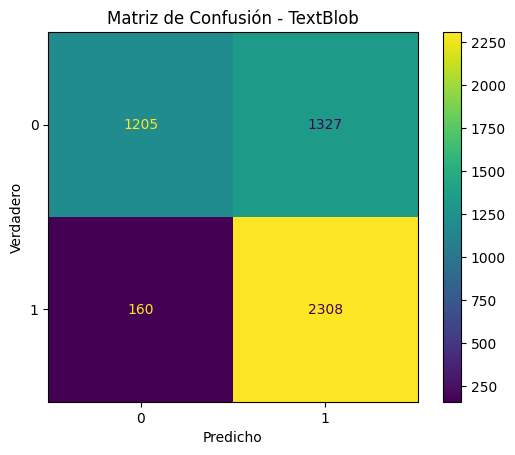

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = textblob_data['Sentimiento']
y_pred = textblob_data['Etiquetas de sentimiento']
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusión - TextBlob')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(textblob_data['Sentimiento'], textblob_data['Etiquetas de sentimiento']))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62      2532
           1       0.63      0.94      0.76      2468

    accuracy                           0.70      5000
   macro avg       0.76      0.71      0.69      5000
weighted avg       0.76      0.70      0.69      5000



# Naive Bayes

In [ ]:
data_depurado

,Texto,Sentimiento
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
4995,interesting slasher film multiple suspects inc...,negative
4996,watched series first came 70s 14 years old wat...,positive
4997,jet li brings charismatic presence movie scree...,positive
4998,rented movie hearing chris gore saying somethi...,negative


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X = data_depurado.iloc[:,0:1].values

print("Dimensiones de la matriz de características:", X.shape)

Dimensiones de la matriz de características: (5000, 1)


In [ ]:
# Importar el módulo CountVectorizer de sklearn para convertir texto en una matriz de recuentos de tokens
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer, limitando el número máximo de características a 2000
cv = CountVectorizer(max_features=2000)

# Aplicar la transformación al corpus de texto para convertirlo en una matriz de recuentos de tokens
# 'fit_transform' ajusta el CountVectorizer a los datos y los transforma en una matriz de características
X = cv.fit_transform(data_depurado['Texto']).toarray()

# Mostrar la primera fila de la matriz de características resultante
# Cada fila representa un documento (opinión) y cada columna representa una palabra en el corpus
X[:1]

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_depurado['Texto'][3]

'basically family little boy jake thinks zombie closet parents fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots 3 10 well playing parents descent dialogs shots jake ignore'

In [ ]:
X.shape

(5000, 2000)

In [ ]:
y=data_depurado.iloc[:,-1].values
y[:10]

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (3500, 2000)
Conjunto de prueba: (1500, 2000)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Crear Gráfica de la matriz
print(y_pred[:20])




['negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'positive' 'positive']


[[637 150]
 [117 596]]


Text(0, 0.5, 'Verdadero')

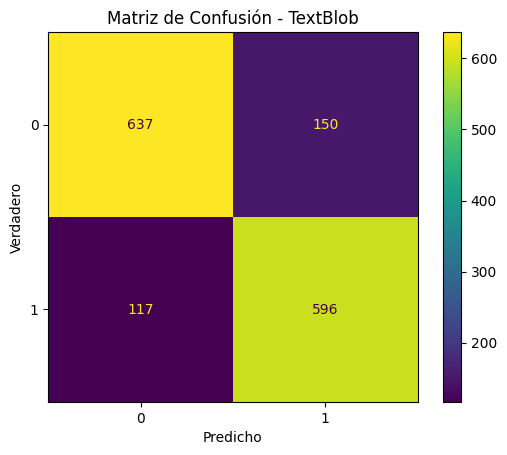

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# crear y mostrar matriz de confusión
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Gráfica de la matriz
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusión - TextBlob')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')

In [ ]:
# del módulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    negative       0.84      0.81      0.83       787
    positive       0.80      0.84      0.82       713

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500

